In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load unknown wine dataset
from sklearn.datasets import load_wine

In [2]:
#assign name to wine dataset
wine=load_wine()
#print dataset attributes for wine dataset
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
#double check that wine.target is our wine type target variable
print (wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
#define variables for machine learning
x=wine.data 
y=wine.target 
#print shapes to double check that x and y have been properly assigned
print(np.shape(x))
print(np.shape(y))

(178, 13)
(178,)


In [5]:
#import train test split
from sklearn.model_selection import train_test_split
#split into train and test sets --> 0.2 = 20% test, 80% train
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print(y_test)

[2 2 0 0 1 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2]


In [6]:
# scale the training data

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

I have commented out scaling here.  When I scale the data, almost all combinations of layers and nodes returns a score of >0.9

In [7]:
#import sklearn packages
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

#create empty lists
scores=[]
scores_list=[]
results=[]

#create a range of numbers of nodes to be tested (1-10)
n = tuple(range(1, 11, 1))
print(n)
#create a range of numbers of layers to be tested (1-3)
l = tuple(range(1,4,1))
print(l)

#build a nested loop to loop through both various numbers of layers and nodes
for l in l:
    layers = np.ones(l, dtype=np.int8) #create an array of ones that loops with l
    print(layers)
    for i in n:
        mlp = MLPClassifier(hidden_layer_sizes=(i*layers), max_iter=2500, random_state=1) #1000 iterations wasn't enough to optimize
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        scores = metrics.accuracy_score(y_test,y_pred)
        print(l,i,scores)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
        if scores > 0.9:
            print(confusion_matrix(y_test,y_pred))
            print(classification_report(y_test,y_pred))

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
(1, 2, 3)
[1]
1 1 0.2777777777777778
1 2 0.3611111111111111
1 3 0.3611111111111111
1 4 0.5833333333333334
1 5 0.9166666666666666
[[10  0  0]
 [ 1 12  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.86      0.92      0.89        13
           2       1.00      0.85      0.92        13

   micro avg       0.92      0.92      0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

1 6 0.2777777777777778
1 7 0.3611111111111111
1 8 0.0
1 9 0.3611111111111111
1 10 0.9722222222222222
[[10  0  0]
 [ 1 12  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        13

   micro avg       0.97      0.97      0.97        36
   macro av

EXPLANATION OF RESULTS:

1) Description of Loop: This nested for loop first loops through the number of layers in MLP Classifier (1,2,3 "l" in this case), and for each layer loops through various numbers of nodes (1-10 "n").  The result of the list will print 3 columns, with the number of layers in the left column, number of nodes in the middle column, and score in the right column.  Additionally, for any model run that returns a score >0.9, a confusion matrix and classification report are printed.  The random state of the model is set to 1, to ensure reproducibility between model runs.

2) Results: Only two model runs returned a score of >0.9, those being 1 layer with 5 nodes, and 1 layer with 10 nodes.  See heat map below for visualization of scores.  The model run containing 1 layer and 10 nodes had the highest accuracy score (0.97, 35/36 predictions were correct) and will thus be used moving forward.  It is worth noting that required computational power should also be a factor in determining which model architecture to use, though those effects are negligible with the simple models tested here.

3) Results cont: In addition to having a higher score, the confusion matrices and classification reports printed above show that the 1 layer, 10 node model perfectly predicts wines in "class 2" (3rd row) (recall score of 1.0) while the 5 node model incorrectly predicts 2 of them as class 1 (recall of 0.85).  The two models are identical in performace for class 0 and class 1, with 0 incorrect predictions for class 0 (recall of 1.0), and one misclassification of class 1 data into class 0 (recall of 0.92).  Recall scores here indicate how effectively the data from each class were classified as that given class.  Precision scores reveal false classifications for a given class.  A precision score of 0.91 for class 0 for both models indicates one false classification of "class 0" from non class 0 data.  The low precision of class 1 in the 5 node model (0.86) quantifies the 2 misclassifications of class 2 wine as class 1 wine.  High f1 scores across the board for both models indicate that there are no hidden discrepencies in the model performance despite its high score (ex: one really low precision or recall).

FINAL DECISION: 1 layer, 10 nodes

In [8]:
#create a matrix with layer, nodes, and scores

#create an empty matrix (alter values to match n and l)
matrix=np.zeros((10,3))
#assign values for each set of layer runs to the array
matrix[:,0] = scores_list[0:10]
matrix[:,1] = scores_list[10:20]
matrix[:,2] = scores_list[20:30]
print(matrix)

[[0.27777778 0.36111111 0.27777778]
 [0.36111111 0.61111111 0.27777778]
 [0.36111111 0.36111111 0.36111111]
 [0.58333333 0.27777778 0.61111111]
 [0.91666667 0.41666667 0.63888889]
 [0.27777778 0.36111111 0.36111111]
 [0.36111111 0.36111111 0.36111111]
 [0.         0.36111111 0.36111111]
 [0.36111111 0.36111111 0.30555556]
 [0.97222222 0.36111111 0.36111111]]


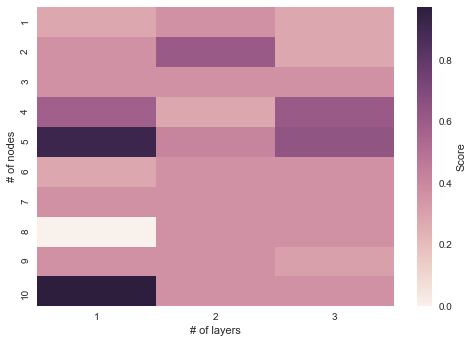

In [9]:
#create heat map of MLP accuracies with various nodes and layers
import seaborn
l = range(1,4,1) #redifining l (its values were lost somewhere along the way) 
heatmap=seaborn.heatmap(matrix, xticklabels=l, yticklabels=n, cbar_kws={'label': 'Score'})
plt.xlabel('# of layers')
plt.ylabel('# of nodes')
plt.show(heatmap)

In [10]:
#test high scoring model on unknown_wine data to predict class of wine
unknown_wine = pd.read_csv('C:/Users/Austin/Desktop/OEAS895_Clayton/unknown_wine.csv') #read in data
#print(unknown_wine)
#run classifier with high scoring model (1 layer, 10 nodes)
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2500, random_state=1) #preserve iterations and random state used for model verification
mlp.fit(X_train, y_train)
y_pred = mlp.predict(unknown_wine)
#predict the probability that each target data point is put into each class
probability = mlp.predict_proba(unknown_wine)
print(y_pred) #class predictions for each of the 10 unknown samples
print(probability) #matrix that reports the probability of each sample (row) belonging to each class (column)

[0 0 0 1 2 1 1 1 1 1]
[[1.00000000e+00 8.02126135e-18 6.84556082e-12]
 [9.99969976e-01 2.35594599e-08 3.00005335e-05]
 [9.91639432e-01 6.28081206e-03 2.07975643e-03]
 [7.12805585e-04 9.42443448e-01 5.68437464e-02]
 [2.71841017e-02 4.95834183e-02 9.23232480e-01]
 [1.17476849e-01 8.67489885e-01 1.50332660e-02]
 [7.51261652e-03 5.11426298e-01 4.81061086e-01]
 [1.89799272e-02 9.80745329e-01 2.74743877e-04]
 [1.01416042e-04 9.62873048e-01 3.70255362e-02]
 [5.43745252e-04 9.96545154e-01 2.91110071e-03]]


The probability matrix above shows that each unknown wine has a probability near or above 0.9 of being classified into its predicted class, with the exception of the 7th unknown wine, which was classified as "class 1" with a probability of only 0.51 for it actually belonging to that class.  Further investigation of that sample should be conducted before completely accepting the results of the classification.